In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    precision_score, 
    recall_score, 
    f1_score,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.ensemble import GradientBoostingClassifier       # classic GBM

In [5]:
#Set styles for better looking plots

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

In [6]:
df = pd.read_csv(r"C:\Users\HomePC\insurance_fraud_engineered.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_pct,property_pct,vehicle_pct,no_witnesses,no_police,unknown_collision,no_authority,red_flag_score,unknown_property,multi_vehicle_no_witness
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,0.090909,0.181818,0.727273,0,0,0,0,1,0,0
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0.153846,0.153846,0.692308,1,0,1,0,2,1,0
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,0.222222,0.111111,0.666667,0,1,0,0,2,0,0
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,0.100000,0.100000,0.800000,0,1,0,0,2,1,0
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,0.200000,0.100000,0.700000,0,1,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,0.200000,0.100000,0.700000,0,0,0,0,1,0,0
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,0.166667,0.166667,0.666667,0,0,0,0,1,0,0
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,0.111111,0.111111,0.777778,0,0,0,0,1,1,0
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,0.111111,0.111111,0.777778,0,0,0,0,1,1,0


In [11]:
print("=" * 70)
print("\n Day 3 Data Modelling" )
print("=" * 70)


 Day 3 Data Modelling


In [12]:

print("\n Dataset Overview:")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"Fraud rate: {df['fraud_reported_binary'].mean():.1%}")


 Dataset Overview:
Total rows: 1000
Total columns: 58
Fraud rate: 24.7%


In [14]:
# Based on Day 2 findings, prioritize these features
features_to_use = [
    # Financial features (strongest predictors)
    'claim_to_premium_ratio',
    'total_claim_amount',
    'policy_annual_premium',
    'injury_claim',
    'property_claim',
    'vehicle_claim',
    'high_value_claim',
    'extreme_claim_ratio',
        # Time features (use continuous, not binary)
    'days_policy_to_incident',
    'months_as_customer',
    
    # Categorical features that matter
    'collision_type',
    'incident_severity',
    'policy_state',
    'incident_state',
    'insured_sex',
    'insured_education_level',
    'insured_occupation',
    
    # Incident details
    'number_of_vehicles_involved',
    'bodily_injuries',
    'witnesses',
    
    # Vehicle info
    'auto_make',
    'auto_year'
]

In [17]:
# Filter to only features that exist in your dataframe
features_to_use = [f for f in features_to_use if f in df.columns]

print(f"\n Using {len(features_to_use)} features for modeling")

# ============================================
# ENCODE CATEGORICAL VARIABLES
# ============================================

print("\n Encoding categorical variables...")

df_model = df.copy()


 Using 22 features for modeling

 Encoding categorical variables...


In [18]:
# Identify categorical columns
categorical_cols = df_model[features_to_use].select_dtypes(include='object').columns.tolist()

print(f"Categorical columns to encode: {len(categorical_cols)}")

# Label encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

Categorical columns to encode: 8


In [20]:
# ============================================
# SPLIT DATA
# ============================================

print("\n Splitting data into train/test sets...")

X = df_model[features_to_use]
y = df_model['fraud_reported_binary']


 Splitting data into train/test sets...


In [22]:
# 80-20 split, stratified to maintain fraud rate
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Training set: {len(X_train)} samples ({y_train.mean():.1%} fraud)")
print(f"Test set: {len(X_test)} samples ({y_test.mean():.1%} fraud)")

print("\n Data preparation complete!")

Training set: 800 samples (24.8% fraud)
Test set: 200 samples (24.5% fraud)

 Data preparation complete!


# TRAIN MODELS

In [23]:
print("\n" + "=" * 70)
print("TRAINING MODELS")
print("=" * 70)

models = {}
results = {}


TRAINING MODELS


In [24]:
models = {}
results = {}

# ============================================
# MODEL 1: LOGISTIC REGRESSION (Baseline)
# ============================================

print("Training Logistic Regression...")
lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr.fit(X_train, y_train)
models['Logistic Regression'] = lr

# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]

# Store results
results['Logistic Regression'] = {
    'predictions': y_pred_lr,
    'probabilities': y_pred_proba_lr,
    'accuracy': (y_pred_lr == y_test).mean(),
    'precision': precision_score(y_test, y_pred_lr),
    'recall': recall_score(y_test, y_pred_lr),
    'f1': f1_score(y_test, y_pred_lr),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_lr)
}

print(f" Logistic Regression trained!")
print(f"   Accuracy: {results['Logistic Regression']['accuracy']:.3f}")
print(f"   Precision: {results['Logistic Regression']['precision']:.3f}")
print(f"   Recall: {results['Logistic Regression']['recall']:.3f}")


# ============================================
# MODEL 2: RANDOM FOREST
# ============================================

print("2️ Training Random Forest...")
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

Training Logistic Regression...
 Logistic Regression trained!
   Accuracy: 0.715
   Precision: 0.457
   Recall: 0.878
2️ Training Random Forest...


C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# ============================================
# TRAIN MODELS
# ============================================

print("\n" + "=" * 70)
print("🤖 TRAINING MODELS")
print("=" * 70)

models = {}
results = {}

# ============================================
# MODEL 1: LOGISTIC REGRESSION (Baseline)
# ============================================

print("\n1️⃣ Training Logistic Regression...")
lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr.fit(X_train, y_train)
models['Logistic Regression'] = lr

# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]

# Store results
results['Logistic Regression'] = {
    'predictions': y_pred_lr,
    'probabilities': y_pred_proba_lr,
    'accuracy': (y_pred_lr == y_test).mean(),
    'precision': precision_score(y_test, y_pred_lr),
    'recall': recall_score(y_test, y_pred_lr),
    'f1': f1_score(y_test, y_pred_lr),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_lr)
}

print(f"✅ Logistic Regression trained!")
print(f"   Accuracy: {results['Logistic Regression']['accuracy']:.3f}")
print(f"   Precision: {results['Logistic Regression']['precision']:.3f}")
print(f"   Recall: {results['Logistic Regression']['recall']:.3f}")

# ============================================
# MODEL 2: RANDOM FOREST
# ============================================

print("\n2️⃣ Training Random Forest...")
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf.fit(X_train, y_train)
models['Random Forest'] = rf

# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Store results
results['Random Forest'] = {
    'predictions': y_pred_rf,
    'probabilities': y_pred_proba_rf,
    'accuracy': (y_pred_rf == y_test).mean(),
    'precision': precision_score(y_test, y_pred_rf),
    'recall': recall_score(y_test, y_pred_rf),
    'f1': f1_score(y_test, y_pred_rf),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_rf)
}

print(f"✅ Random Forest trained!")
print(f"   Accuracy: {results['Random Forest']['accuracy']:.3f}")
print(f"   Precision: {results['Random Forest']['precision']:.3f}")
print(f"   Recall: {results['Random Forest']['recall']:.3f}")

# ============================================
# MODEL 3: XGBOOST (Best Performance)
# ============================================

print("\n3️⃣ Training XGBoost...")

# Calculate scale_pos_weight for imbalanced data
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)
xgb.fit(X_train, y_train)
models['XGBoost'] = xgb

# Predictions
y_pred_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# Store results
# results['XGBoost'] = {
#     'predictions': y_pred_xgb,
#     'probabilities': y_pred_proba_xgb,
#     'accuracy': (y_pred_xgb == y_test).mean(),
#     'precision': precision_score(y_test, y_pred_xgb),
#     'recall': recall_score(y_test, y_pred_xgb),
#     'f1': f1_score(y_test, y_pred_xgb),
#     'roc_auc': roc_auc_score(y_test, y_pred_proba_xgb)
# }

print(f"✅ XGBoost trained!")
print(f"   Accuracy: {results['XGBoost']['accuracy']:.3f}")
print(f"   Precision: {results['XGBoost']['precision']:.3f}")
print(f"   Recall: {results['XGBoost']['recall']:.3f}")

print("\n✅ All models trained!")


🤖 TRAINING MODELS

1️⃣ Training Logistic Regression...


C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Logistic Regression trained!
   Accuracy: 0.715
   Precision: 0.457
   Recall: 0.878

2️⃣ Training Random Forest...
✅ Random Forest trained!
   Accuracy: 0.835
   Precision: 0.643
   Recall: 0.735

3️⃣ Training XGBoost...


NameError: name 'XGBClassifier' is not defined

In [29]:
from sklearn.ensemble import HistGradientBoostingClassifier

print("\n3️⃣ Training HistGradientBoosting (sklearn GBM)...")
hgb = HistGradientBoostingClassifier(
    max_iter=200,                # like n_estimators
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    class_weight='balanced'      # or use sample_weight
)
hgb.fit(X_train, y_train)

# Then same predictions & metrics code as before
y_pred_hgb = hgb.predict(X_test)
y_pred_proba_hgb = hgb.predict_proba(X_test)[:, 1]

# Store in results['HistGradientBoosting'] = { ... }


3️⃣ Training HistGradientBoosting (sklearn GBM)...


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=5000, random_state=42, class_weight='balanced')
lr.fit(X_train_scaled, y_train)   # ← use scaled data

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42)


📊 MODEL COMPARISON

              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression     0.715   0.457447 0.877551  0.601399 0.849304
      Random Forest     0.835   0.642857 0.734694  0.685714 0.792134

🏆 Best Model (by Precision): Random Forest

🔍 DETAILED ANALYSIS: Random Forest

📋 Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.91      0.87      0.89       151
       Fraud       0.64      0.73      0.69        49

    accuracy                           0.83       200
   macro avg       0.78      0.80      0.79       200
weighted avg       0.84      0.83      0.84       200


📊 Confusion Matrix:
                 Predicted
                 Legit  Fraud
Actual  Legit      131     20
        Fraud       13     36

📈 Creating visualizations...


FileNotFoundError: [Errno 2] No such file or directory: 'visualizations/confusion_matrices.png'

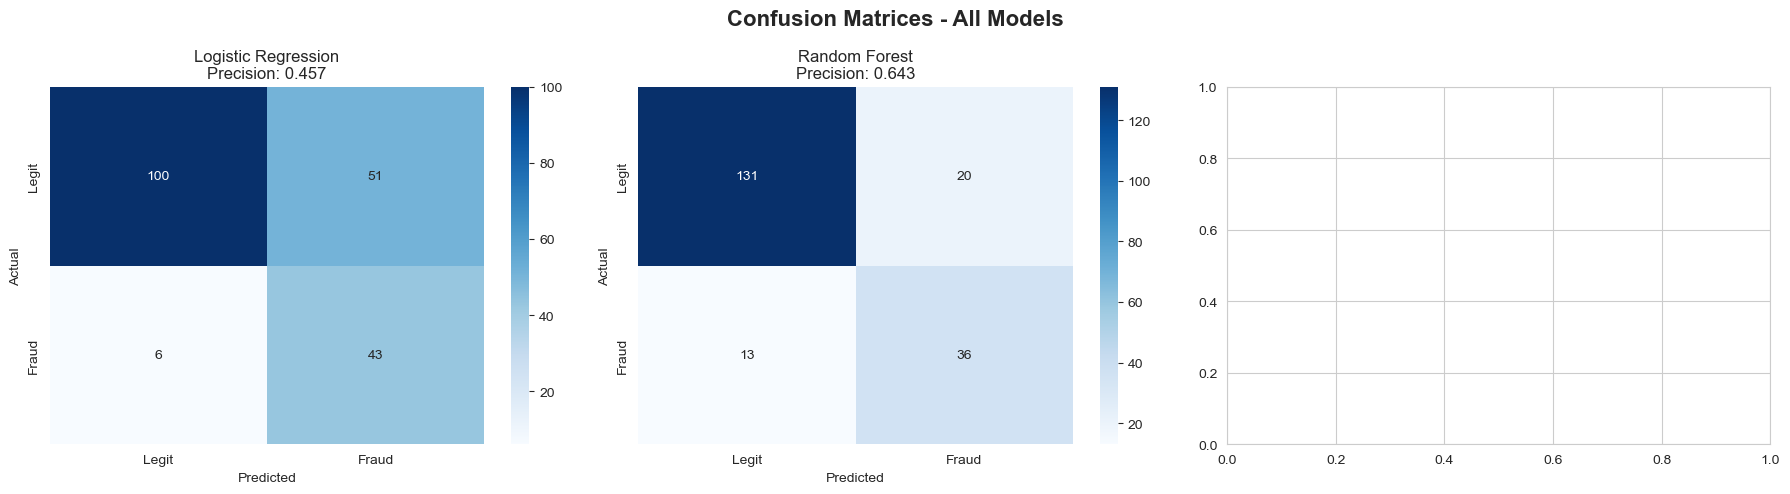

In [31]:
# ============================================
# MODEL COMPARISON
# ============================================

print("\n" + "=" * 70)
print("📊 MODEL COMPARISON")
print("=" * 70)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1'] for m in results.keys()],
    'ROC-AUC': [results[m]['roc_auc'] for m in results.keys()]
})

print("\n" + comparison_df.to_string(index=False))

# Find best model by precision (our priority metric)
best_model_name = comparison_df.loc[comparison_df['Precision'].idxmax(), 'Model']
print(f"\n🏆 Best Model (by Precision): {best_model_name}")

# ============================================
# DETAILED EVALUATION OF BEST MODEL
# ============================================

print("\n" + "=" * 70)
print(f"🔍 DETAILED ANALYSIS: {best_model_name}")
print("=" * 70)

best_predictions = results[best_model_name]['predictions']
best_probabilities = results[best_model_name]['probabilities']

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, best_predictions, 
                          target_names=['Legitimate', 'Fraud']))

# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions)
print("\n📊 Confusion Matrix:")
print(f"                 Predicted")
print(f"                 Legit  Fraud")
print(f"Actual  Legit     {cm[0,0]:>4}   {cm[0,1]:>4}")
print(f"        Fraud     {cm[1,0]:>4}   {cm[1,1]:>4}")

# ============================================
# VISUALIZATIONS
# ============================================

print("\n📈 Creating visualizations...")

# Figure 1: Confusion Matrices for all models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices - All Models', fontsize=16, fontweight='bold')

for idx, (model_name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Legit', 'Fraud'],
                yticklabels=['Legit', 'Fraud'],
                ax=axes[idx])
    axes[idx].set_title(f'{model_name}\nPrecision: {result["precision"]:.3f}')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_xlabel('Predicted')

plt.tight_layout()
plt.savefig('visualizations/confusion_matrices.png', dpi=300, bbox_inches='tight')
print("✅ Saved: visualizations/confusion_matrices.png")
plt.show()

# Figure 2: Model Performance Comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart of metrics
comparison_df_melted = comparison_df.melt(id_vars='Model', 
                                           var_name='Metric', 
                                           value_name='Score')
metrics_plot = comparison_df_melted[comparison_df_melted['Metric'] != 'Accuracy']

ax1 = axes[0]
x = np.arange(len(results))
width = 0.2
metrics = ['Precision', 'Recall', 'F1-Score', 'ROC-AUC']

for i, metric in enumerate(metrics):
    values = comparison_df[metric].values
    ax1.bar(x + i*width, values, width, label=metric)

ax1.set_xlabel('Model', fontweight='bold')
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_title('Model Performance Metrics', fontweight='bold', fontsize=14)
ax1.set_xticks(x + width * 1.5)
ax1.set_xticklabels(comparison_df['Model'], rotation=15)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim([0, 1])

# ROC Curves
ax2 = axes[1]
for model_name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
    ax2.plot(fpr, tpr, label=f'{model_name} (AUC = {result["roc_auc"]:.3f})', linewidth=2)

ax2.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.set_title('ROC Curves', fontweight='bold', fontsize=14)
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('visualizations/model_performance.png', dpi=300, bbox_inches='tight')
print("✅ Saved: visualizations/model_performance.png")
plt.show()


🎯 FEATURE IMPORTANCE ANALYSIS

🔝 Top 15 Most Important Features:
                Feature  Importance
      incident_severity    0.328725
     total_claim_amount    0.061380
          vehicle_claim    0.060441
     insured_occupation    0.059967
         property_claim    0.057515
 claim_to_premium_ratio    0.056423
days_policy_to_incident    0.053950
  policy_annual_premium    0.048436
           injury_claim    0.042565
              auto_year    0.038226
     months_as_customer    0.037927
         incident_state    0.026126
              witnesses    0.025726
              auto_make    0.025609
insured_education_level    0.022150


FileNotFoundError: [Errno 2] No such file or directory: 'visualizations/feature_importance.png'

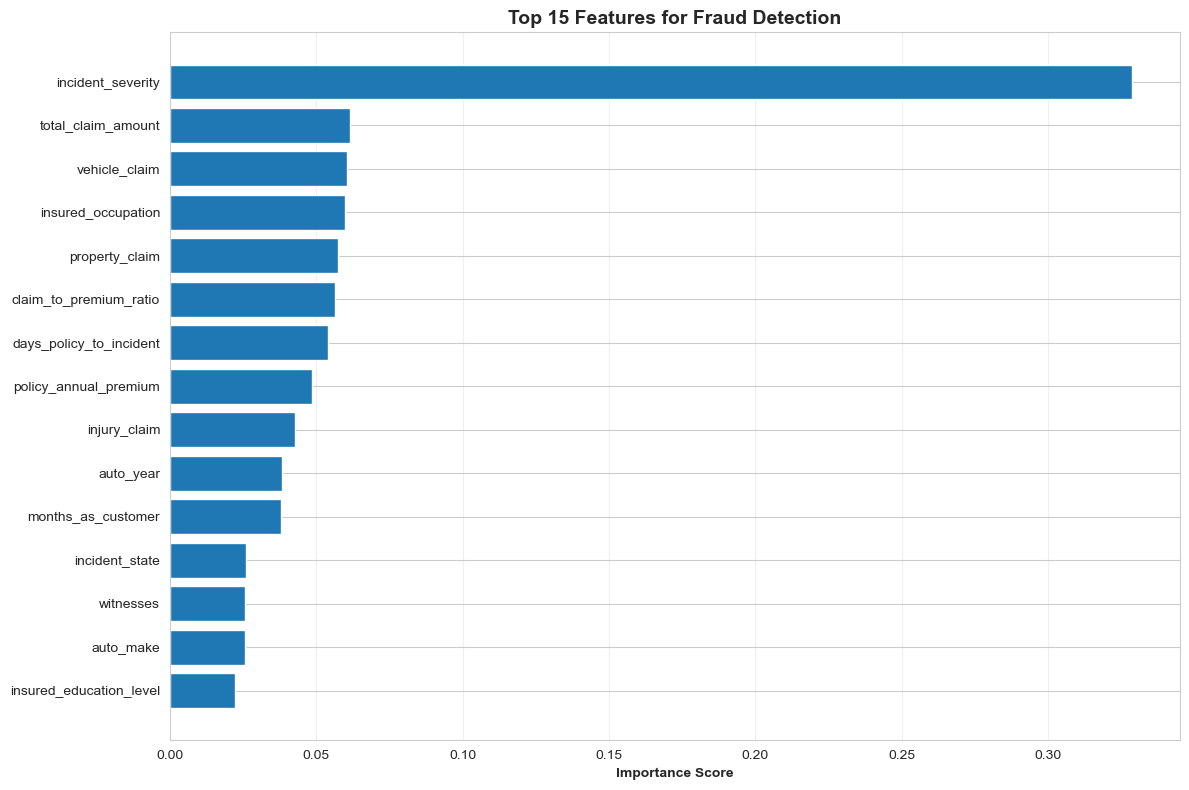

In [32]:
# ============================================
# FEATURE IMPORTANCE
# ============================================

print("\n" + "=" * 70)
print("🎯 FEATURE IMPORTANCE ANALYSIS")
print("=" * 70)

# Get feature importance from Random Forest (most interpretable)
feature_importance = pd.DataFrame({
    'Feature': features_to_use,
    'Importance': models['Random Forest'].feature_importances_
}).sort_values('Importance', ascending=False)

print("\n🔝 Top 15 Most Important Features:")
print(feature_importance.head(15).to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Importance'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance Score', fontweight='bold')
plt.title('Top 15 Features for Fraud Detection', fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('visualizations/feature_importance.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: visualizations/feature_importance.png")
plt.show()

# Feature importance insights
print("\n💡 KEY INSIGHTS:")
print(f"1. Top predictor: {feature_importance.iloc[0]['Feature']} ({feature_importance.iloc[0]['Importance']:.3f})")
print(f"2. Second: {feature_importance.iloc[1]['Feature']} ({feature_importance.iloc[1]['Importance']:.3f})")
print(f"3. Third: {feature_importance.iloc[2]['Feature']} ({feature_importance.iloc[2]['Importance']:.3f})")

top_3_importance = feature_importance.head(3)['Importance'].sum()
print(f"\nTop 3 features account for {top_3_importance:.1%} of total importance")

In [33]:
# ============================================
# BUSINESS IMPACT ANALYSIS
# ============================================

print("\n" + "=" * 70)
print("💰 BUSINESS IMPACT ANALYSIS")
print("=" * 70)

# Use best model for business calculations
best_model = models[best_model_name]
y_pred_best = results[best_model_name]['predictions']
y_proba_best = results[best_model_name]['probabilities']

# Calculate confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best).ravel()

# Business assumptions
avg_fraud_amount = df[df['fraud_reported_binary']==1]['total_claim_amount'].mean()
avg_investigation_cost = 500  # Cost to investigate one claim
total_annual_claims = 1000  # Scale from test set

print(f"\n📊 Test Set Performance:")
print(f"True Positives (Fraud Caught): {tp}")
print(f"False Positives (False Alarms): {fp}")
print(f"False Negatives (Missed Fraud): {fn}")
print(f"True Negatives (Correctly Cleared): {tn}")

# Calculate financial impact
fraud_caught_value = tp * avg_fraud_amount
false_alarm_cost = fp * avg_investigation_cost
missed_fraud_cost = fn * avg_fraud_amount

print(f"\n💵 Financial Impact (Test Set):")
print(f"Fraud Caught: ${fraud_caught_value:,.0f}")
print(f"Investigation Costs: ${false_alarm_cost:,.0f}")
print(f"Missed Fraud: ${missed_fraud_cost:,.0f}")
print(f"Net Savings: ${fraud_caught_value - false_alarm_cost:,.0f}")

# Scale to annual
scale_factor = total_annual_claims / len(y_test)
annual_fraud_caught = fraud_caught_value * scale_factor
annual_investigation_cost = false_alarm_cost * scale_factor
annual_missed_fraud = missed_fraud_cost * scale_factor
annual_net_savings = annual_fraud_caught - annual_investigation_cost

print(f"\n📈 Projected Annual Impact ({total_annual_claims} claims):")
print(f"Fraud Prevented: ${annual_fraud_caught:,.0f}")
print(f"Investigation Costs: ${annual_investigation_cost:,.0f}")
print(f"Missed Fraud: ${annual_missed_fraud:,.0f}")
print(f"NET SAVINGS: ${annual_net_savings:,.0f}")

# ROI Calculation
roi = (annual_net_savings / annual_investigation_cost) * 100
print(f"\n🎯 ROI: {roi:.0f}%")

# ============================================
# RISK TIER ANALYSIS
# ============================================

print("\n" + "=" * 70)
print("🚦 RISK TIER ANALYSIS")
print("=" * 70)

# Create risk tiers based on probability
df_test = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred_best,
    'probability': y_proba_best
})

# Define risk tiers
df_test['risk_tier'] = pd.cut(
    df_test['probability'],
    bins=[0, 0.4, 0.7, 1.0],
    labels=['Low', 'Medium', 'High']
)

# Analyze each tier
print("\n Risk Tier Distribution:")
for tier in ['Low', 'Medium', 'High']:
    tier_data = df_test[df_test['risk_tier'] == tier]
    if len(tier_data) > 0:
        fraud_rate = tier_data['actual'].mean()
        precision = precision_score(tier_data['actual'], tier_data['predicted']) if tier_data['predicted'].sum() > 0 else 0
        count = len(tier_data)
        
        print(f"\n{tier} Risk:")
        print(f"  Cases: {count} ({count/len(df_test):.1%})")
        print(f"  Actual Fraud Rate: {fraud_rate:.1%}")
        print(f"  Precision: {precision:.1%}")
        print(f"  Recommendation: {'Immediate investigation' if tier=='High' else 'Enhanced review' if tier=='Medium' else 'Standard processing'}")

print("\n✅ Business impact analysis complete!")


💰 BUSINESS IMPACT ANALYSIS

📊 Test Set Performance:
True Positives (Fraud Caught): 36
False Positives (False Alarms): 20
False Negatives (Missed Fraud): 13
True Negatives (Correctly Cleared): 131

💵 Financial Impact (Test Set):
Fraud Caught: $2,170,876
Investigation Costs: $10,000
Missed Fraud: $783,927
Net Savings: $2,160,876

📈 Projected Annual Impact (1000 claims):
Fraud Prevented: $10,854,379
Investigation Costs: $50,000
Missed Fraud: $3,919,637
NET SAVINGS: $10,804,379

🎯 ROI: 21609%

🚦 RISK TIER ANALYSIS

 Risk Tier Distribution:

Low Risk:
  Cases: 136 (68.0%)
  Actual Fraud Rate: 8.8%
  Precision: 0.0%
  Recommendation: Standard processing

Medium Risk:
  Cases: 52 (26.0%)
  Actual Fraud Rate: 59.6%
  Precision: 68.2%
  Recommendation: Enhanced review

High Risk:
  Cases: 12 (6.0%)
  Actual Fraud Rate: 50.0%
  Precision: 50.0%
  Recommendation: Immediate investigation

✅ Business impact analysis complete!


In [35]:
import os

# Create necessary directories
os.makedirs('visualizations', exist_ok=True)
os.makedirs('models', exist_ok=True)

print("✅ Directories created!")

✅ Directories created!


In [36]:
# ============================================
# SAVE MODELS
# ============================================

import joblib

print("\n" + "=" * 70)
print("💾 SAVING MODELS")
print("=" * 70)

for model_name, model in models.items():
    filename = f"models/{model_name.lower().replace(' ', '_')}.pkl"
    joblib.dump(model, filename)
    print(f" Saved: {filename}")

# Save label encoders
joblib.dump(label_encoders, 'models/label_encoders.pkl')
print(f" Saved: models/label_encoders.pkl")

# Save feature list
with open('models/feature_list.txt', 'w') as f:
    for feature in features_to_use:
        f.write(f"{feature}\n")
print(f" Saved: models/feature_list.txt")

print("\n All models saved successfully!")


💾 SAVING MODELS
✅ Saved: models/logistic_regression.pkl
✅ Saved: models/random_forest.pkl
✅ Saved: models/label_encoders.pkl
✅ Saved: models/feature_list.txt

🎉 All models saved successfully!


In [37]:
import os
import joblib

# Create directories
os.makedirs('visualizations', exist_ok=True)
os.makedirs('models', exist_ok=True)


# save models
for model_name, model in models.items():
    filename = f"models/{model_name.lower().replace(' ', '_')}.pkl"
    joblib.dump(model, filename)
    print(f" Saved: {filename}")

# Save label encoders
joblib.dump(label_encoders, 'models/label_encoders.pkl')
print(f" Saved: models/label_encoders.pkl")

# Save feature list
with open('models/feature_list.txt', 'w') as f:
    for feature in features_to_use:
        f.write(f"{feature}\n")
print(f" Saved: models/feature_list.txt")

print("Everything saved!")

✅ Saved: models/logistic_regression.pkl
✅ Saved: models/random_forest.pkl
✅ Saved: models/label_encoders.pkl
✅ Saved: models/feature_list.txt

🎉 Everything saved!
